# Importing required libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

# Opening the required csv file

In [2]:
df = pd.read_csv(r"C:\Users\lavanya\Downloads\nasa\nasa.csv")
df.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [3]:
df_n = df.select_dtypes(include = ['number'])
df_n

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,1.161429,39.880491,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,1.075134,5.360249,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,1.528234,4.405467,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,1.486600,21.080244,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767


# Plotting boxplots to check for outliers

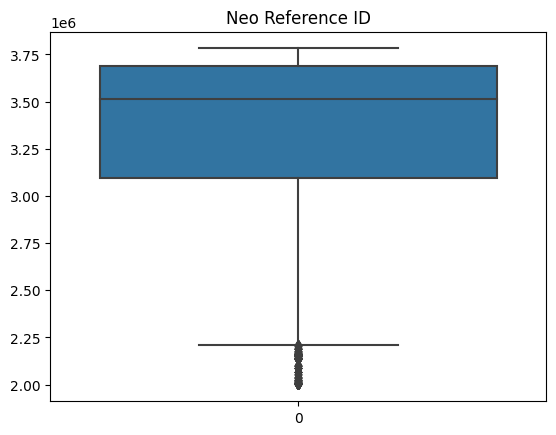

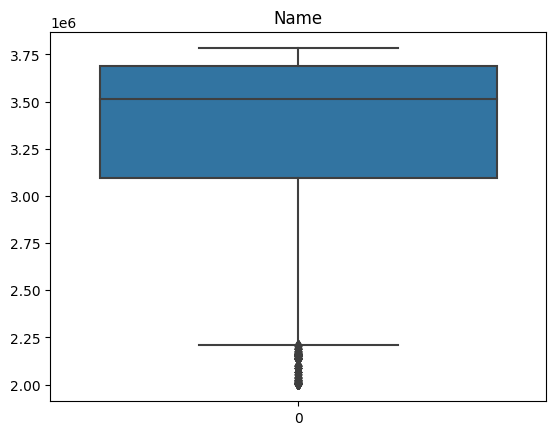

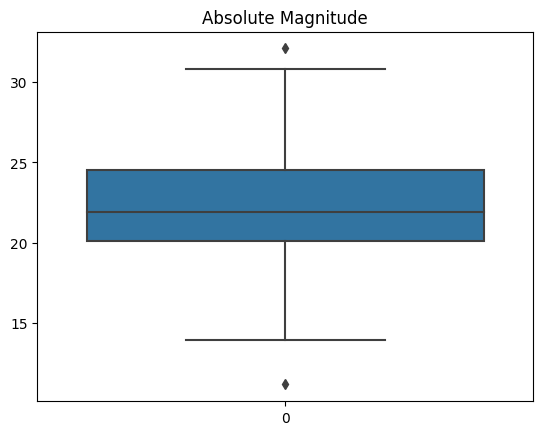

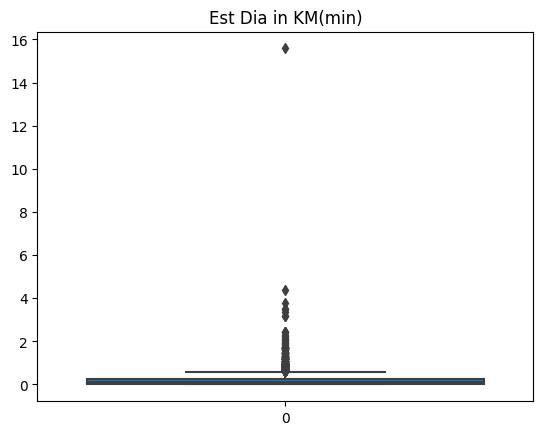

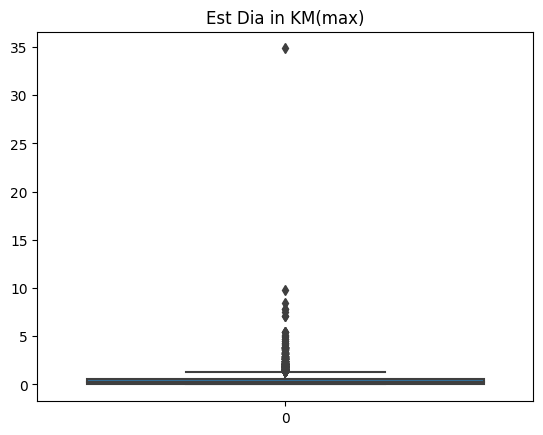

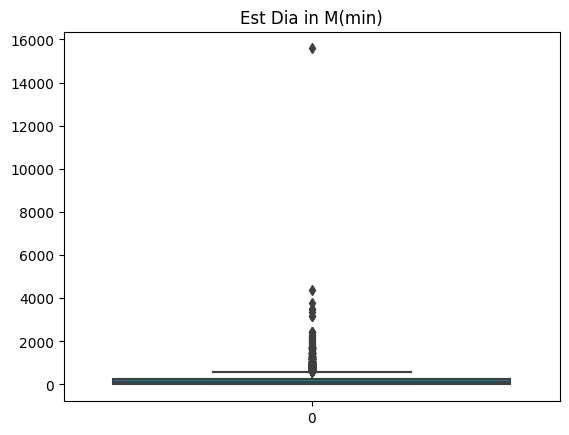

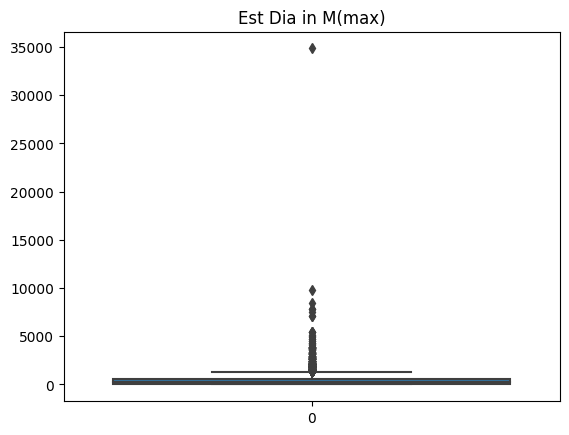

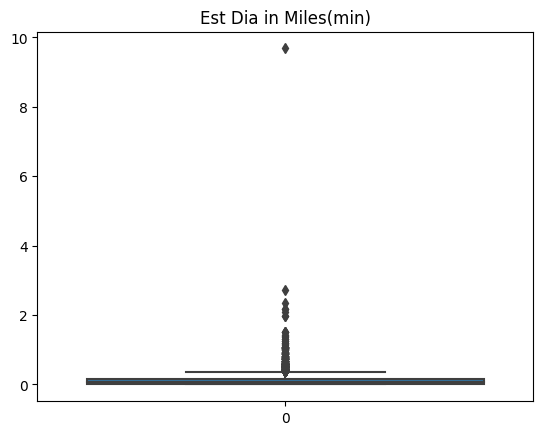

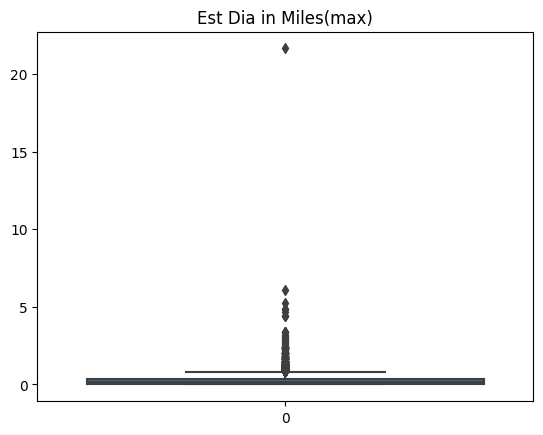

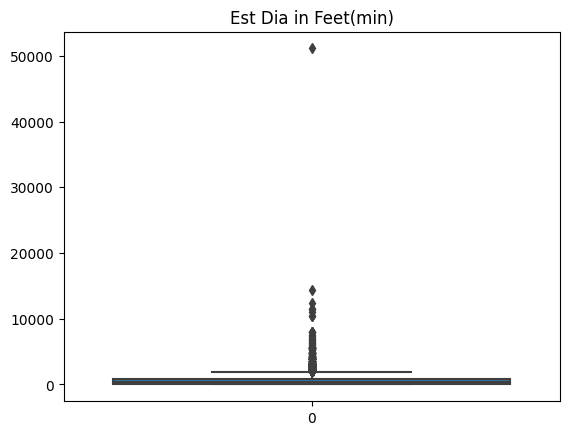

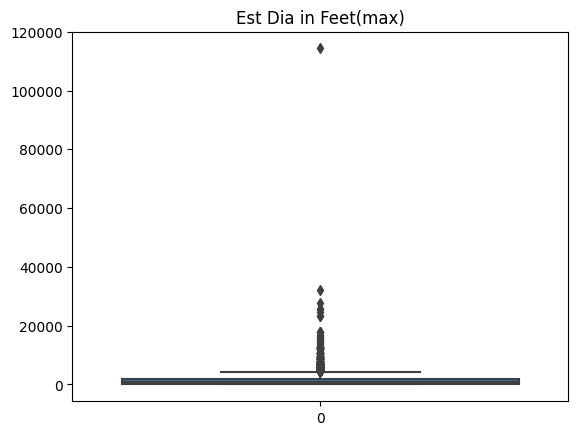

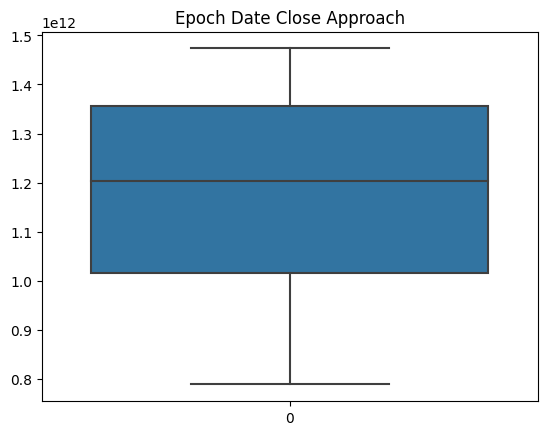

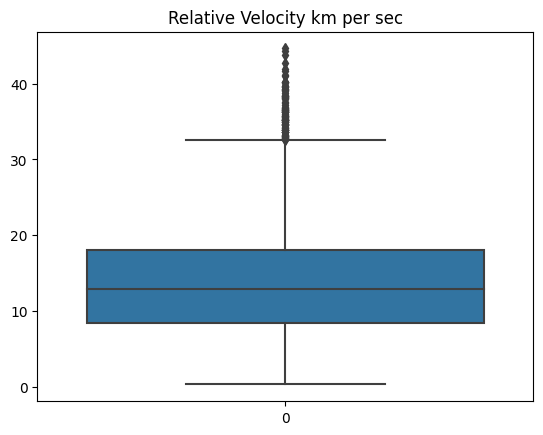

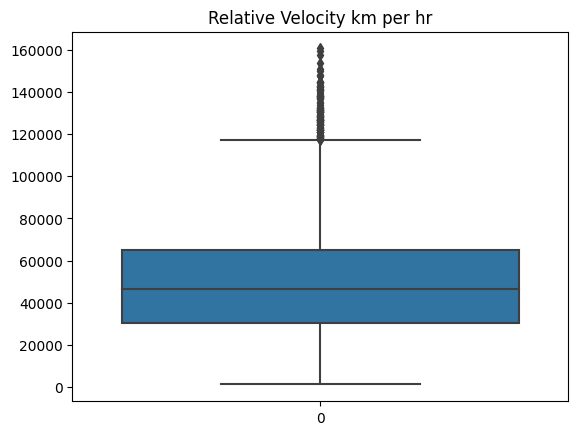

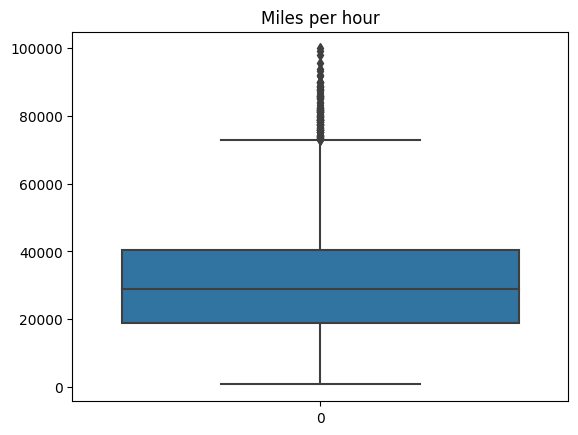

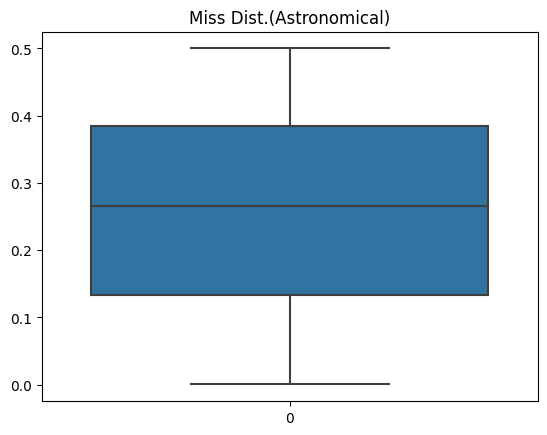

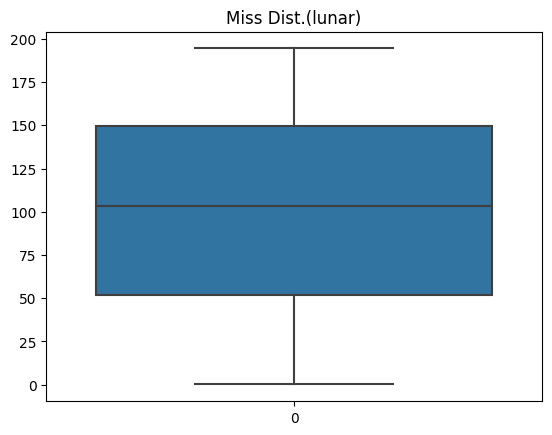

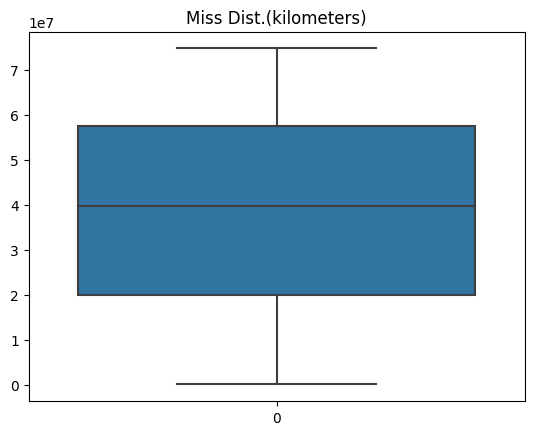

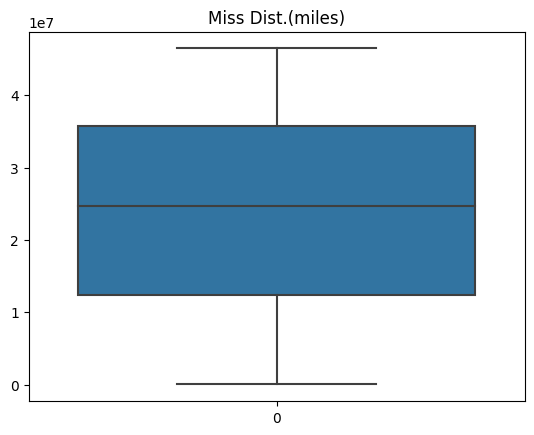

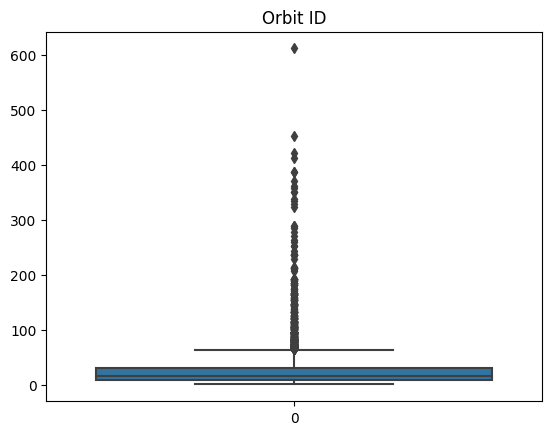

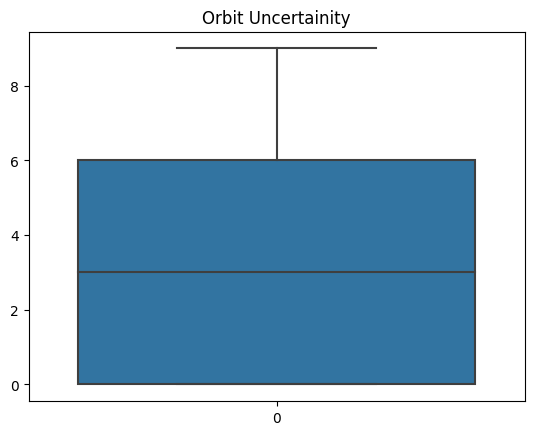

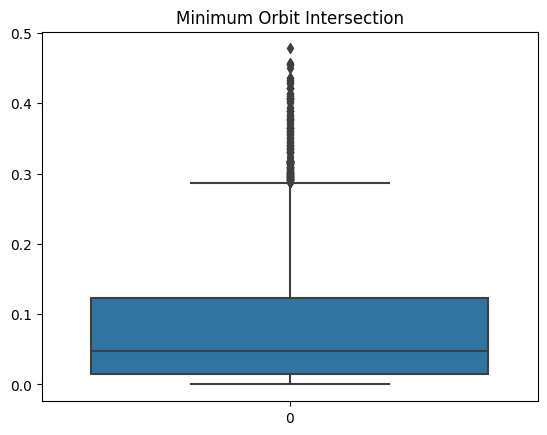

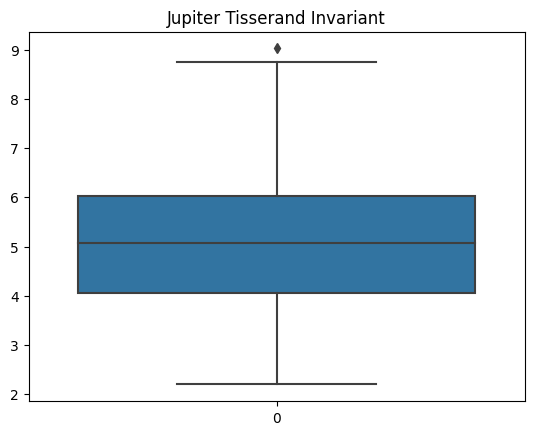

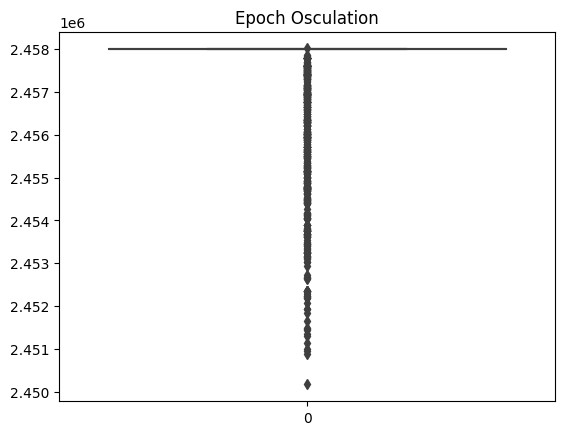

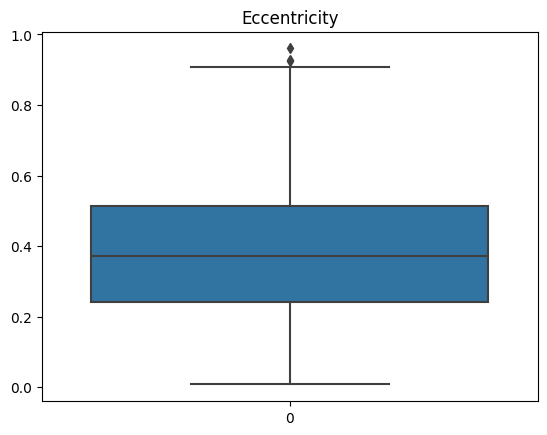

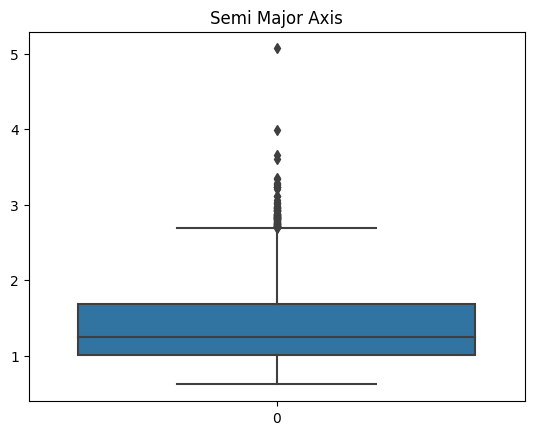

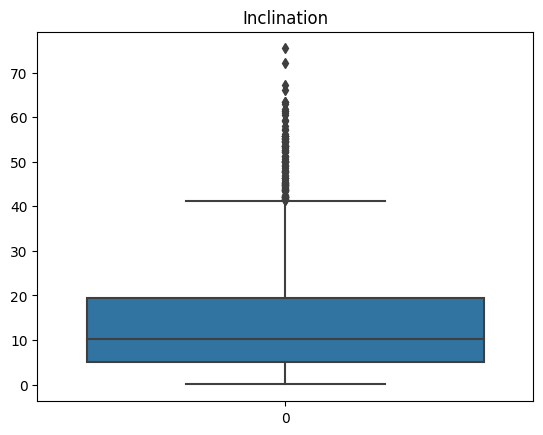

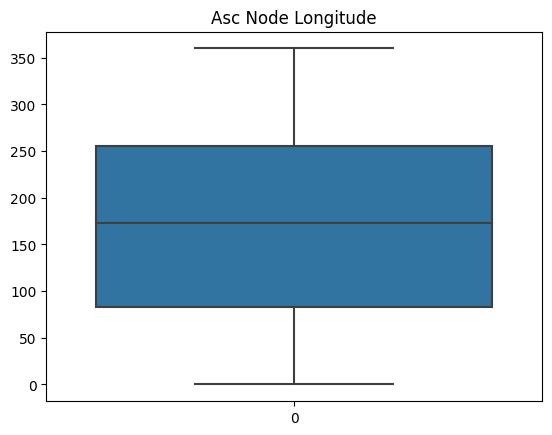

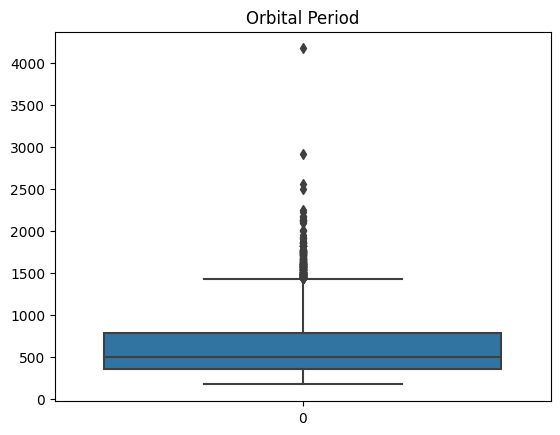

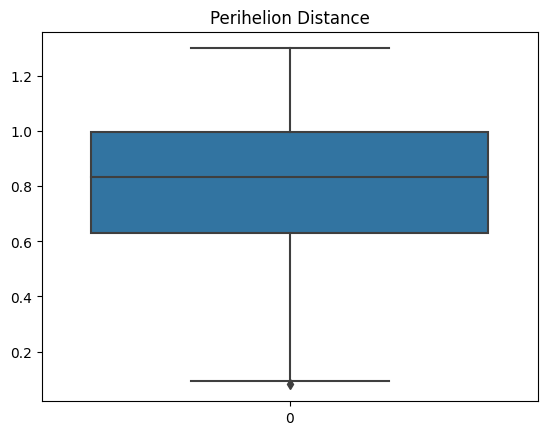

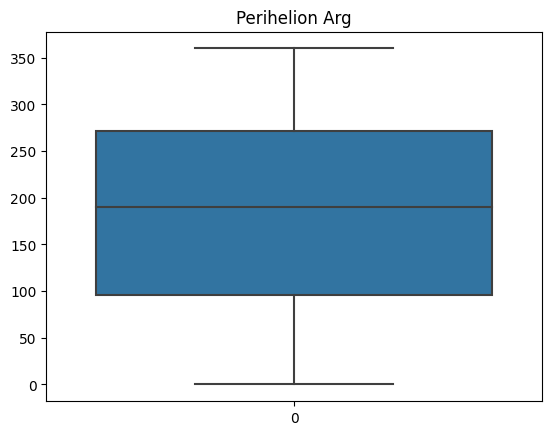

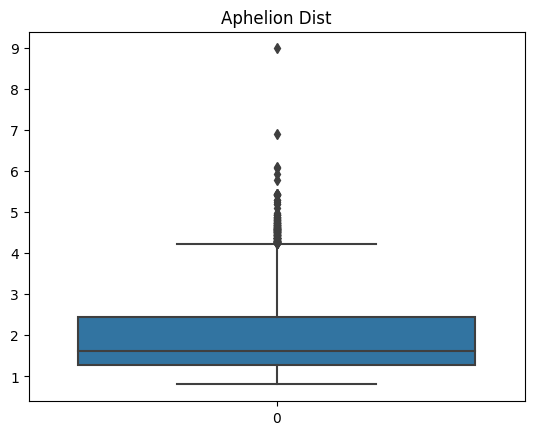

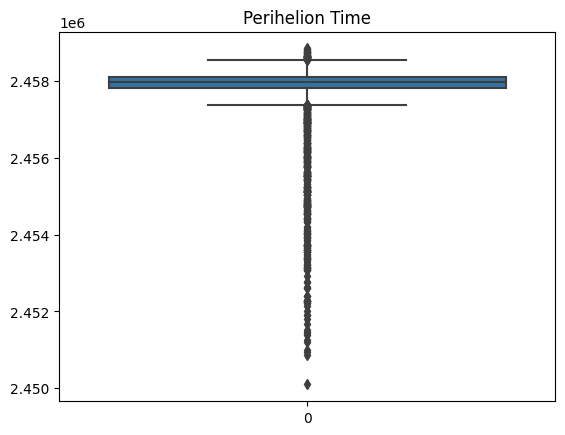

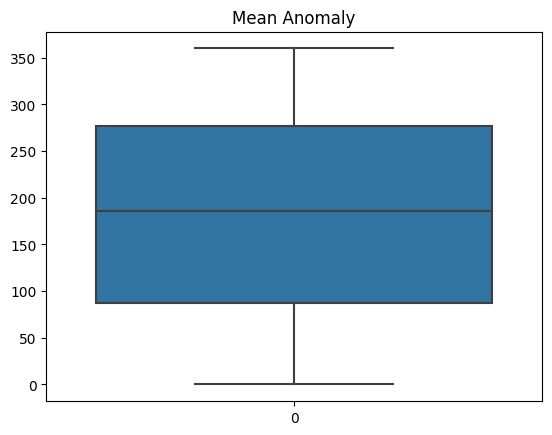

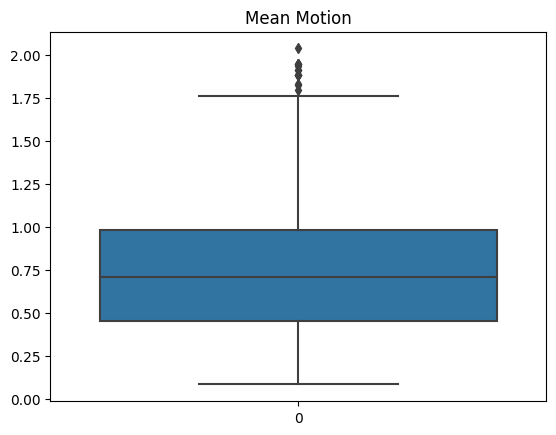

In [4]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

# Using IQR to remove outliers

In [5]:
def wisker(col):
  q1=df_n[col].quantile(0.25)
  q3=df_n[col].quantile(0.75)
  iqr=q3-q1
  lower=q1-(1.5*iqr)
  upper=q3+(1.5*iqr)
  return lower,upper

In [6]:
for i in df_n.columns:
  lower,upper=wisker(i)
  df_n[i]=np.where(df_n[i]<=lower,lower,df_n[i])
  df_n[i]=np.where(df_n[i]>=upper,upper,df_n[i])

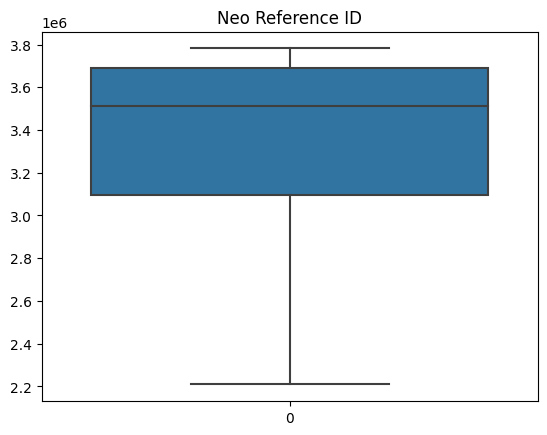

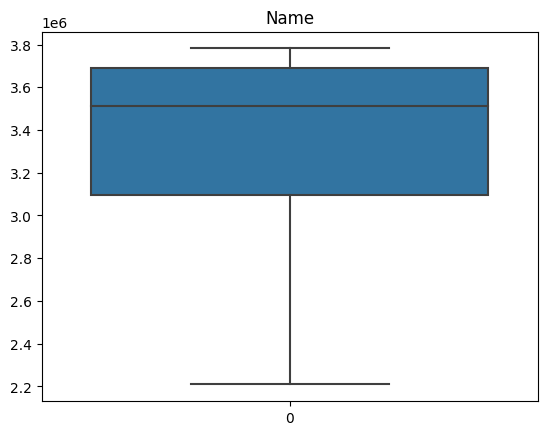

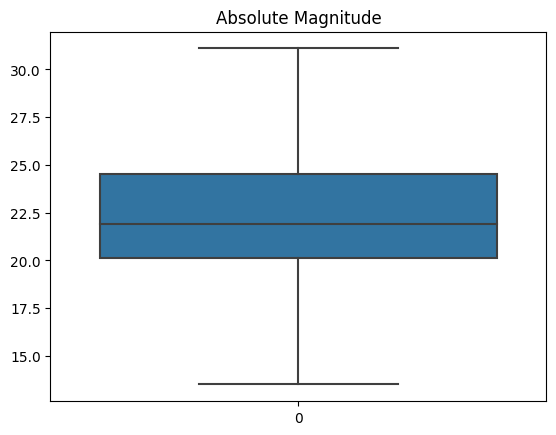

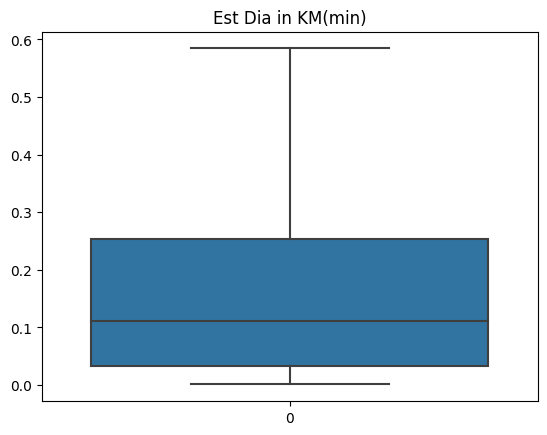

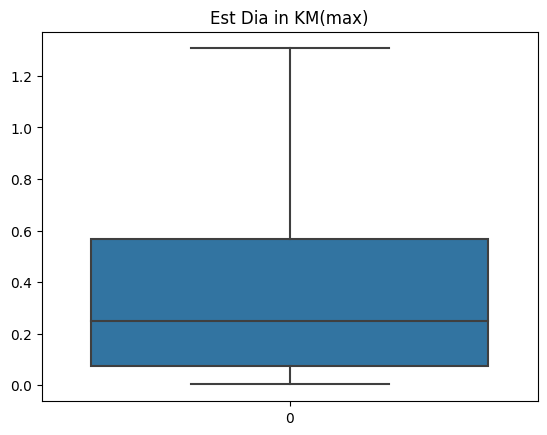

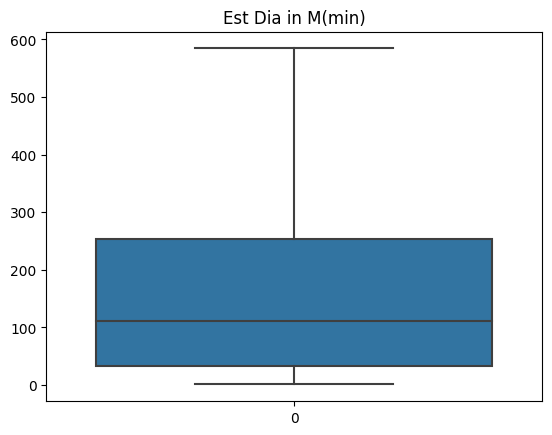

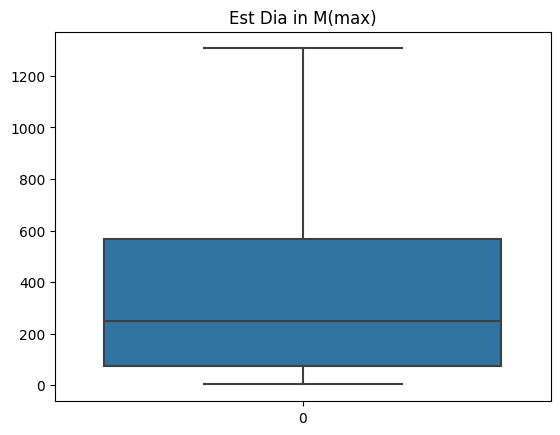

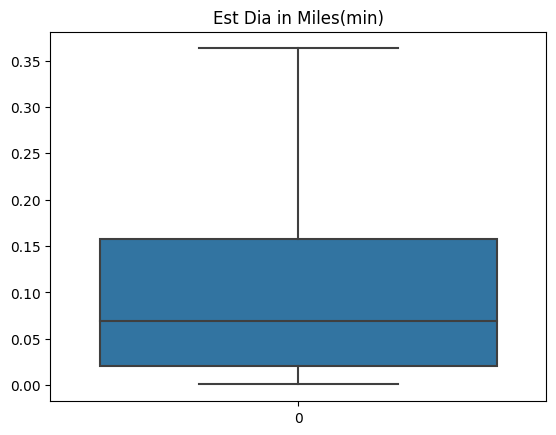

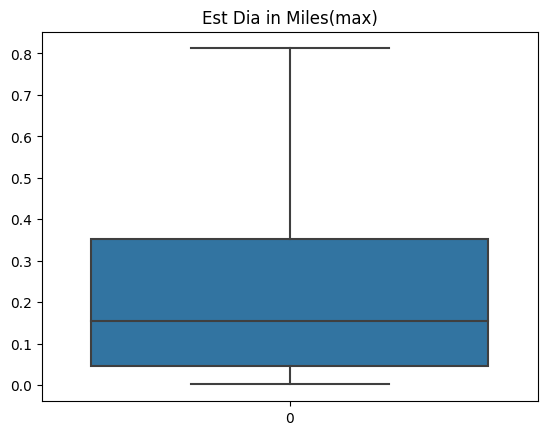

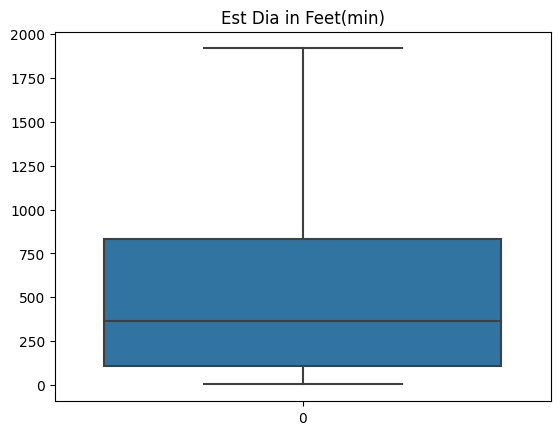

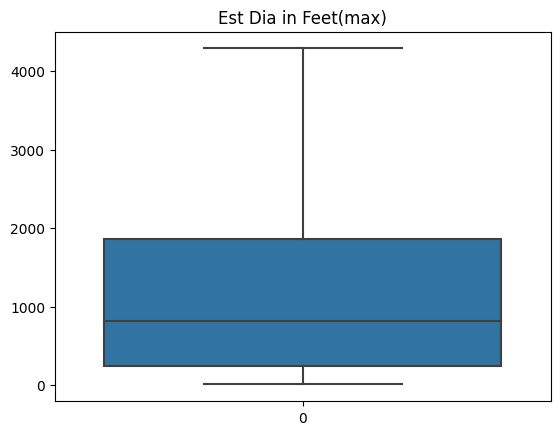

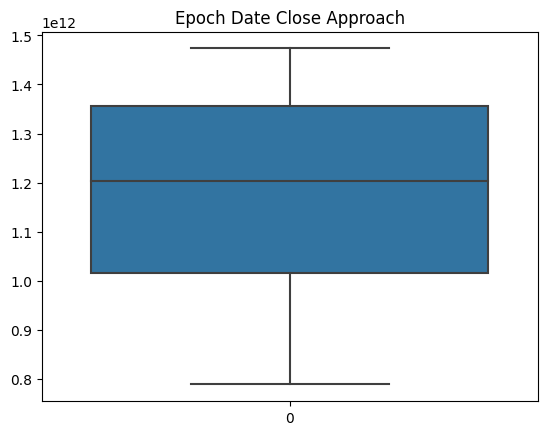

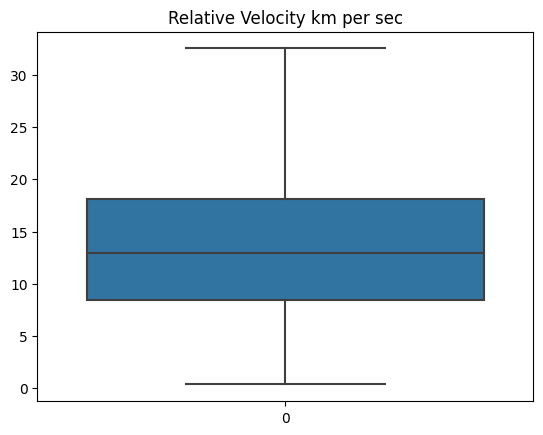

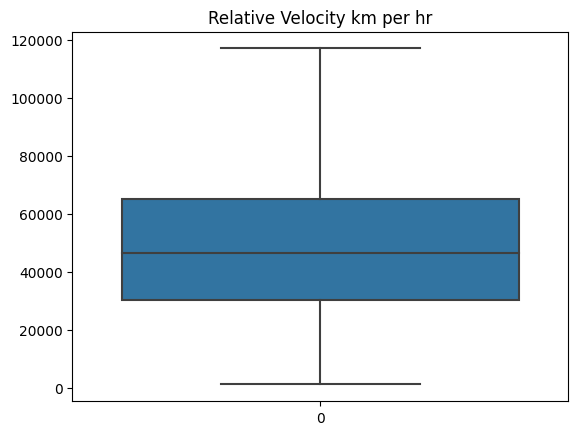

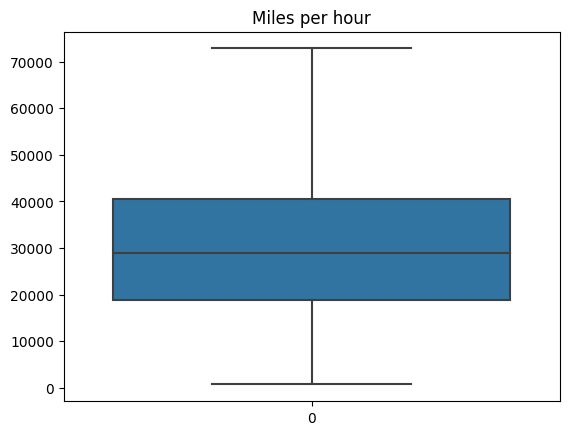

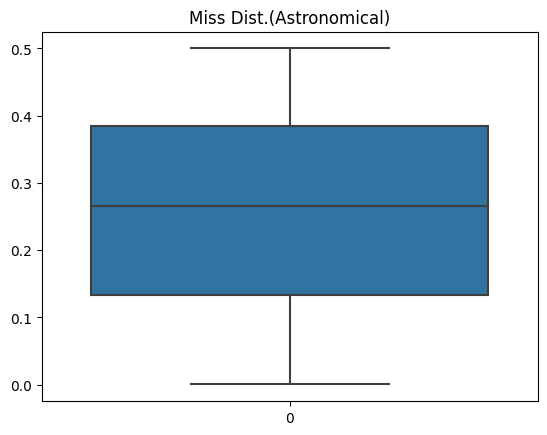

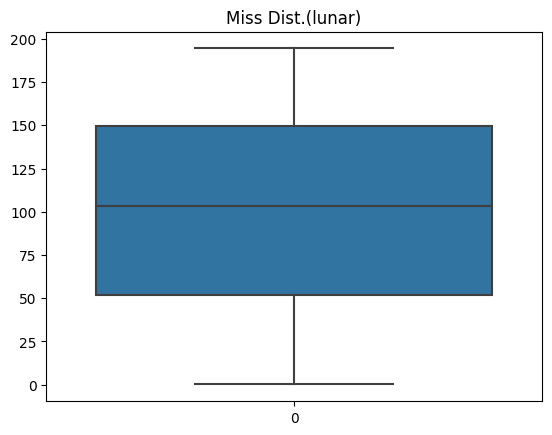

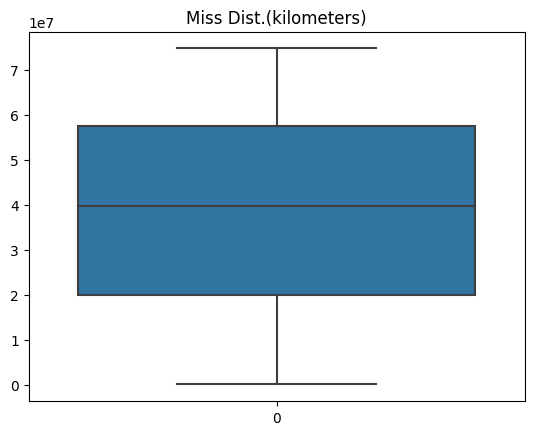

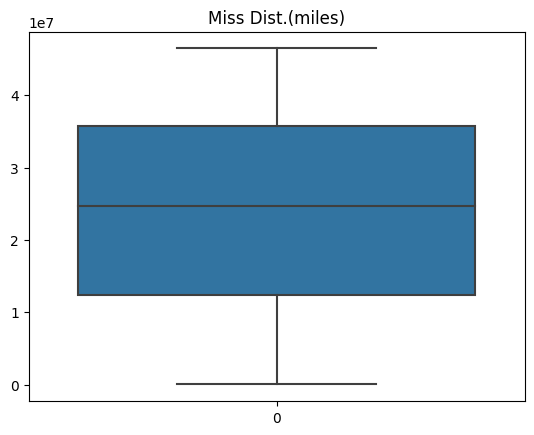

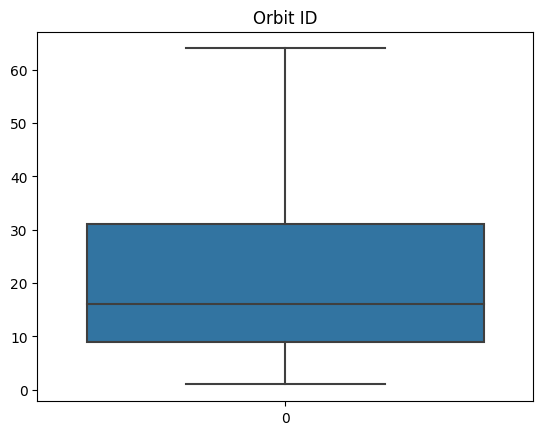

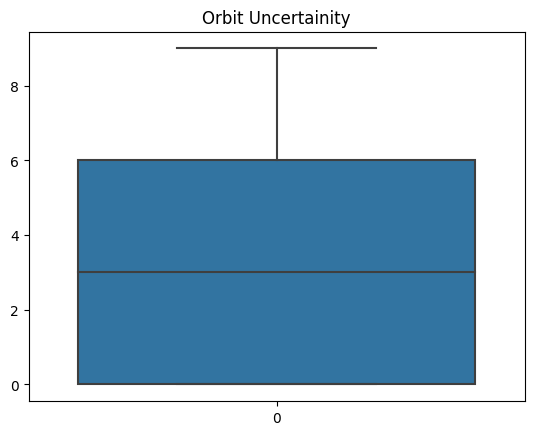

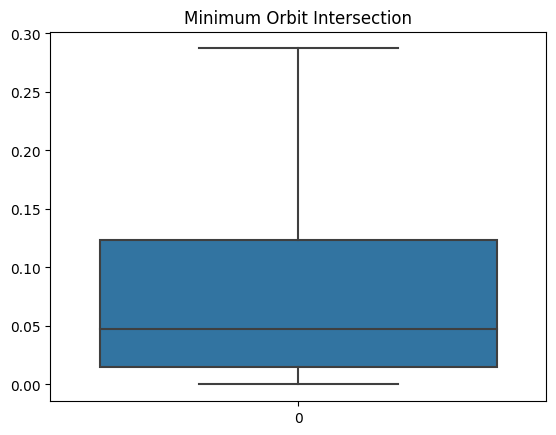

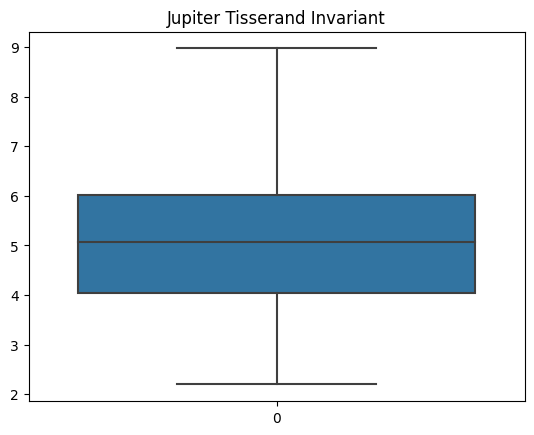

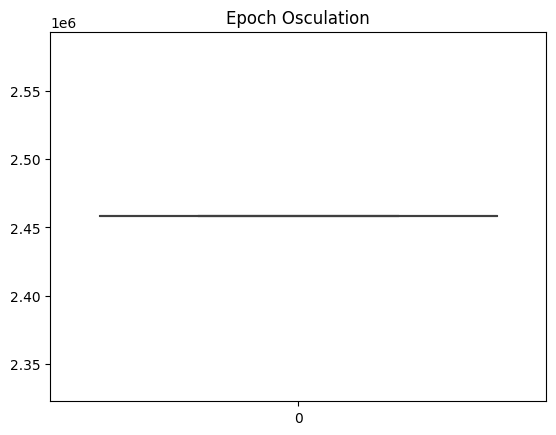

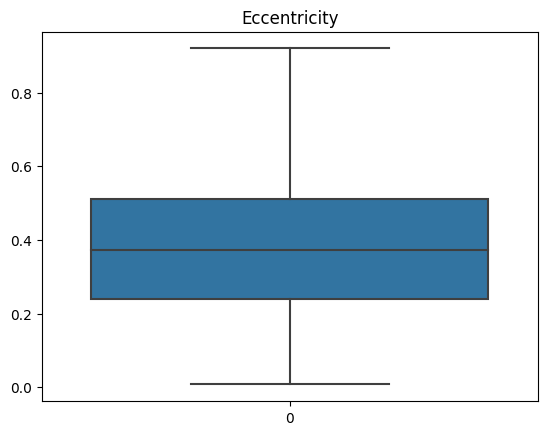

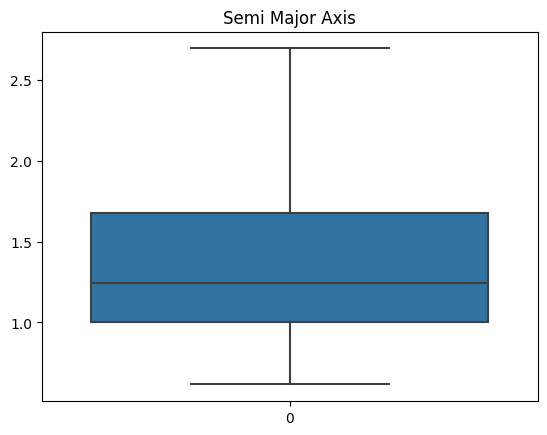

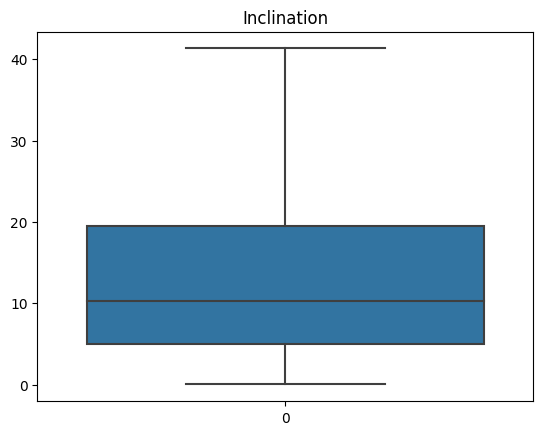

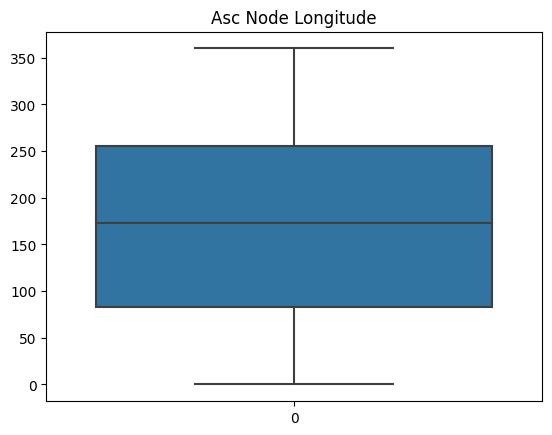

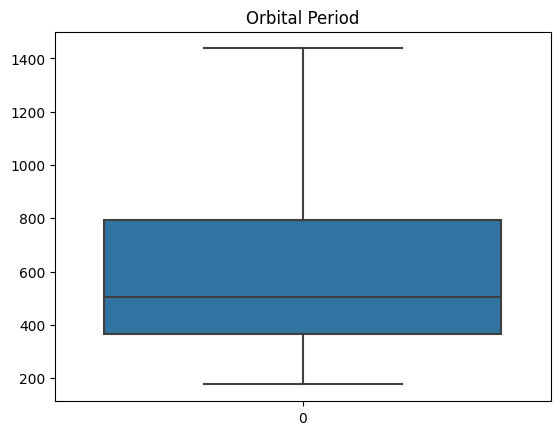

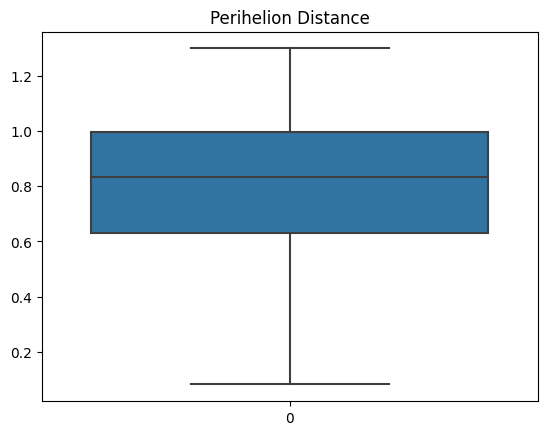

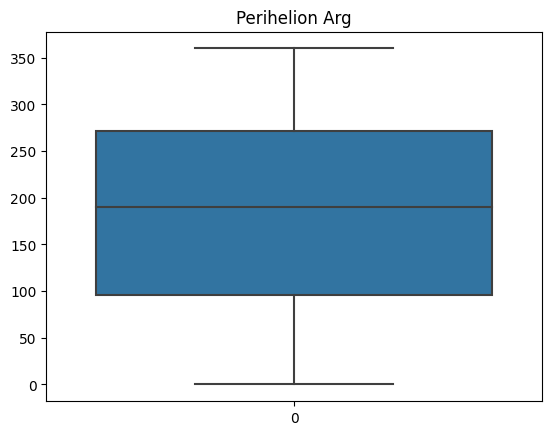

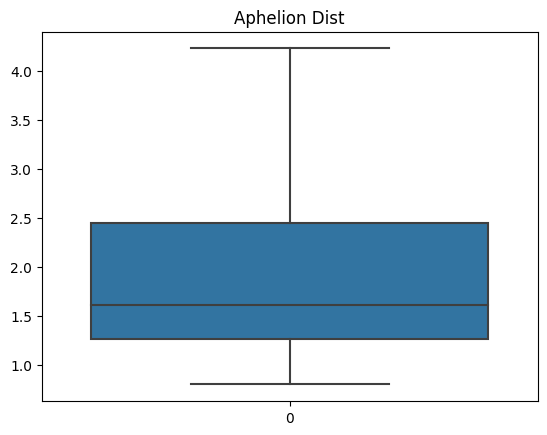

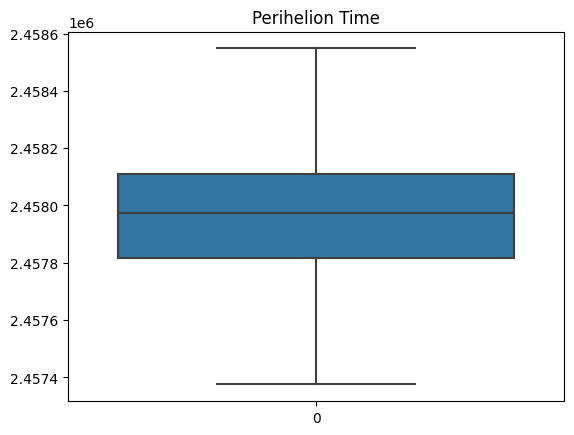

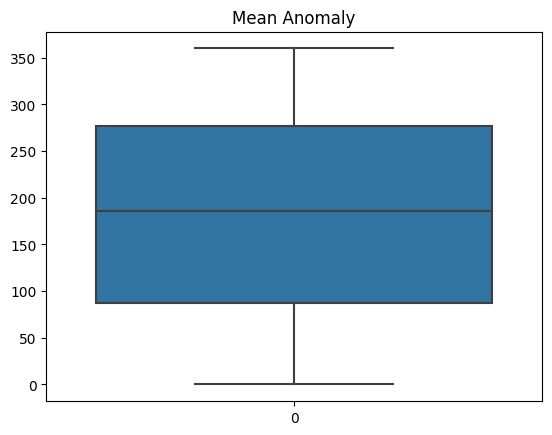

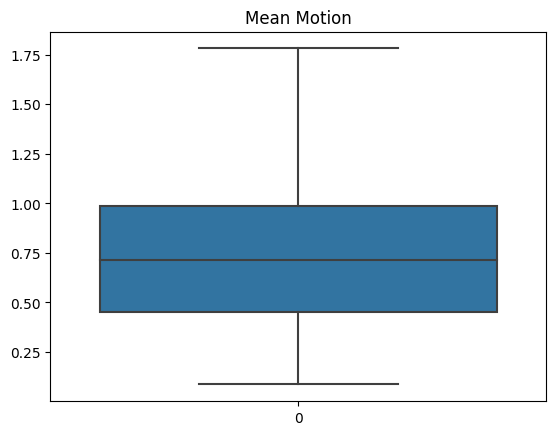

In [7]:
for i in df_n.columns:
    plt.title(i)
    sns.boxplot(df_n[i])
    plt.show()

# Encoding Target variable

In [8]:
df["Hazardous"]

LE = LabelEncoder()

df["Hazardous"] = LE.fit_transform(df["Hazardous"])

In [9]:
df["Hazardous"]

0       1
1       0
2       1
3       0
4       1
       ..
4682    0
4683    0
4684    0
4685    0
4686    0
Name: Hazardous, Length: 4687, dtype: int64

# Standardizing the Input features to bring them to same scale

In [10]:
SS = StandardScaler()
#MM = MinMaxScaler()

#df_n_f = SS.fit_transform(df_n_f)

# df_n[df_n.columns] = SS.fit_transform(df_n)
df_n[df_n.columns] = SS.fit_transform(df_n)

In [11]:
X = df_n

In [12]:
Y = df["Hazardous"]

# Splitting into Training and Testing data

In [13]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.3,random_state=43,stratify=Y)

# Performing PCA using entire features and plotting number of components and cev

Text(0, 0.5, 'cumulative explained variance')

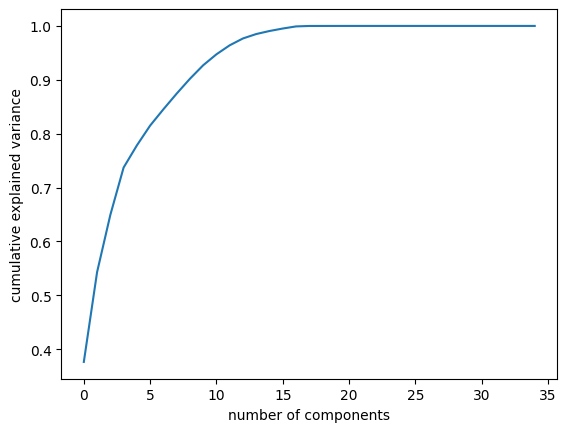

In [16]:
pca = PCA().fit(X_Train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
# pca = PCA(n_components=2)  # Set n_components to the number of dimensions you want to keep
# pca.fit(X)



# By looking into the above graph, we can see that the number of components that capture around 95% of the variance is around 15.

In [17]:
pca = PCA(n_components=15)
pca.fit(X_Train)

PCA(n_components=15)

# Separating X_Train_PCA and X_Test_PCA

In [19]:
X_Train_pca = pca.transform(X_Train)
X_Test_pca = pca.transform(X_Test)

# Building the models

In [21]:
logistic_model = LogisticRegression(penalty='none')

logistic_model.fit(X_Train_pca,Y_Train)

LogisticRegression(penalty='none')

In [22]:
Y_pred_Train = logistic_model.predict(X_Train_pca)

Y_pred_Test = logistic_model.predict(X_Test_pca)

# Calculate accuracy
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")

Accuracy of Test data is: 0.92
[[1149   31]
 [  80  147]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1180
           1       0.83      0.65      0.73       227

    accuracy                           0.92      1407
   macro avg       0.88      0.81      0.84      1407
weighted avg       0.92      0.92      0.92      1407



In [23]:
lasso_model = LogisticRegression(penalty='l1', solver='liblinear')  # solver='liblinear' is used for L1 regularization
lasso_model.fit(X_Train_pca, Y_Train)
Y_pred_Lasso_Test = lasso_model.predict(X_Test_pca)

accuracy_test = accuracy_score(Y_Test, Y_pred_Lasso_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Lasso_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Lasso_Test)
print(f"Classification Report:\n{report}")

Accuracy of Test data is: 0.92
[[1149   31]
 [  83  144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1180
           1       0.82      0.63      0.72       227

    accuracy                           0.92      1407
   macro avg       0.88      0.80      0.83      1407
weighted avg       0.91      0.92      0.91      1407



In [24]:
ridge_model = LogisticRegression(penalty='l2')
ridge_model.fit(X_Train_pca, Y_Train)
Y_pred_Ridge_Test = ridge_model.predict(X_Test_pca)

accuracy_test = accuracy_score(Y_Test, Y_pred_Ridge_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Ridge_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Ridge_Test)
print(f"Classification Report:\n{report}")

Accuracy of Test data is: 0.92
[[1149   31]
 [  85  142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1180
           1       0.82      0.63      0.71       227

    accuracy                           0.92      1407
   macro avg       0.88      0.80      0.83      1407
weighted avg       0.91      0.92      0.91      1407



In [25]:
RFC = RandomForestClassifier(random_state=43,n_estimators=3000)
RFC.fit(X_Train_pca, Y_Train)

Y_pred_Train=RFC.predict(X_Train_pca)
accuracy_train = accuracy_score(Y_Train, Y_pred_Train)
print(f"Accuracy of Training data is: {accuracy_train:.2f}")

print(confusion_matrix(Y_Train,Y_pred_Train))

# Generate a classification report
report = classification_report(Y_Train, Y_pred_Train)
print(f"Classification Report:\n{report}")



Y_pred_Test=RFC.predict(X_Test_pca)
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")

Accuracy of Training data is: 1.00
[[2752    0]
 [   0  528]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2752
           1       1.00      1.00      1.00       528

    accuracy                           1.00      3280
   macro avg       1.00      1.00      1.00      3280
weighted avg       1.00      1.00      1.00      3280

Accuracy of Test data is: 0.92
[[1170   10]
 [ 104  123]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      1180
           1       0.92      0.54      0.68       227

    accuracy                           0.92      1407
   macro avg       0.92      0.77      0.82      1407
weighted avg       0.92      0.92      0.91      1407



In [27]:
modelgbc = GradientBoostingClassifier(random_state=43,learning_rate=0.1,n_estimators=3000)
modelgbc.fit(X_Train_pca, Y_Train)
Y_pred_Test=modelgbc.predict(X_Test_pca)
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")


Accuracy of Test data is: 0.95
[[1148   32]
 [  45  182]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1180
           1       0.85      0.80      0.83       227

    accuracy                           0.95      1407
   macro avg       0.91      0.89      0.90      1407
weighted avg       0.94      0.95      0.94      1407



In [28]:
modelada = AdaBoostClassifier(random_state=43,learning_rate=0.1,n_estimators=3000)
modelada.fit(X_Train_pca, Y_Train)
Y_pred_Test=modelada.predict(X_Test_pca)
accuracy_test = accuracy_score(Y_Test, Y_pred_Test)
print(f"Accuracy of Test data is: {accuracy_test:.2f}")

print(confusion_matrix(Y_Test,Y_pred_Test))

# Generate a classification report
report = classification_report(Y_Test, Y_pred_Test)
print(f"Classification Report:\n{report}")


Accuracy of Test data is: 0.93
[[1145   35]
 [  58  169]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1180
           1       0.83      0.74      0.78       227

    accuracy                           0.93      1407
   macro avg       0.89      0.86      0.87      1407
weighted avg       0.93      0.93      0.93      1407



# Importing mlflow and saving the parameters in mlflow

In [29]:
import mlflow
import os
os.environ['GIT_PYTHON_REFRESH'] = 'quiet'
os.environ['MLFLOW_TRACKING_URI']='file:///Users/lavanya/Desktop/QT-MLF/'

In [30]:
mlflow.set_experiment("Nasa-analysis_pca_ss")
mlflow.set_experiment_tag("Nasa-tag",'ex1')

2024/08/01 15:58:17 INFO mlflow.tracking.fluent: Experiment with name 'Nasa-analysis_pca_ss' does not exist. Creating a new experiment.


In [31]:
with mlflow.start_run():    
    
    # model object initialization
    logistic_model = LogisticRegression(penalty='none')
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear')  # solver='liblinear' is used for L1 regularization
    ridge_model = LogisticRegression(penalty='l2')
    RFC=RandomForestClassifier(n_estimators=3000,max_depth=10,random_state=43)
    GBM=GradientBoostingClassifier(n_estimators=3000,max_depth=10,learning_rate=0.1,min_samples_split=5)
    ADA = AdaBoostClassifier(random_state=43,learning_rate=0.1,n_estimators=3000)
    
    #logging parameters
    mlflow.log_param("rfn_estimators",3000)
    mlflow.log_param('rf_max_depth',10)
    mlflow.log_param('gbm_n_estimators',3000)
    mlflow.log_param('gbm_max_depth',10)
    mlflow.log_param('gbm_learning_rate',0.1)
    mlflow.log_param('gbm_minimum_samples_split',5)
    mlflow.log_param('ada-learning_rate',0.1)
    mlflow.log_param('ada_n_estimators',3000)

    
    
    #training models
    logmodel=logistic_model.fit(X_Train_pca,Y_Train)
    lassomodel=lasso_model.fit(X_Train_pca,Y_Train)
    ridgemodel=ridge_model.fit(X_Train_pca,Y_Train)
    rfc=RFC.fit(X_Train_pca,Y_Train)
    gbm=GBM.fit(X_Train_pca,Y_Train)
    ada=ADA.fit(X_Train_pca,Y_Train)

    
    #training scores
    training_score_logmodel=logistic_model.score(X_Train_pca,Y_Train)
    training_score_lassomodel=lasso_model.score(X_Train_pca,Y_Train)
    training_score_ridgemodel=ridge_model.score(X_Train_pca,Y_Train)
    training_score_rfc=RFC.score(X_Train_pca,Y_Train)
    training_score_gbm=GBM.score(X_Train_pca,Y_Train)
    training_score_ada=ADA.score(X_Train_pca,Y_Train)

    
    #logging training score
    mlflow.log_metric("logmodel_training_score", training_score_logmodel)
    mlflow.log_metric("lassomodel_training_score", training_score_lassomodel)
    mlflow.log_metric("ridgemodel_training_score", training_score_ridgemodel)
    mlflow.log_metric("rf_training_score", training_score_rfc)
    mlflow.log_metric("gbm_training_score",training_score_gbm)
    mlflow.log_metric("ada_training_score",training_score_ada)

    
    #value predictions
    y_pred_logmodel=logmodel.predict(X_Test_pca)
    y_pred_lassomodel=lassomodel.predict(X_Test_pca)
    y_pred_ridgemodel=ridgemodel.predict(X_Test_pca)
    y_pred_rf=rfc.predict(X_Test_pca)
    y_pred_gbm=gbm.predict(X_Test_pca)
    y_pred_ada=ada.predict(X_Test_pca)

    
    #prediction evaluations
    testing_score_logmodel=f1_score(y_pred_logmodel,Y_Test,average="macro")
    testing_score_lassomodel=f1_score(y_pred_lassomodel,Y_Test,average="macro")
    testing_score_ridgemodel=f1_score(y_pred_ridgemodel,Y_Test,average="macro")
    testing_score_rfc=f1_score(y_pred_rf,Y_Test,average="macro")
    testing_score_gbm=f1_score(y_pred_gbm,Y_Test,average="macro")
    testing_score_ada=f1_score(y_pred_ada,Y_Test,average="macro")

    
    #logging evaluation scores
    mlflow.log_metric("logmodel_testing_score", testing_score_logmodel)
    mlflow.log_metric("lassomodel_testing_score", testing_score_lassomodel)
    mlflow.log_metric("ridgemodel_testing_score", testing_score_ridgemodel)
    mlflow.log_metric("rf_testing_score", testing_score_rfc)
    mlflow.log_metric("gbm_testing_score",testing_score_gbm)
    mlflow.log_metric("ada_testing_score",testing_score_ada)

    
    #logging models
    mlflow.sklearn.log_model(logmodel, "logistic-regression-model")
    mlflow.sklearn.log_model(lassomodel, "lasso-model")
    mlflow.sklearn.log_model(ridgemodel, "ridge-model")
    mlflow.sklearn.log_model(rfc, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(ada, "ada-boosting-model")